In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:

def maximally_distant_points(points):

    max_distance = 0
    max_pair = None
    
    pbc = 22.009548038010326 - -1.0380103268104445e-06 

    # Generate all pairs of points
    pairs = combinations(points, 2)
    
    # Iterate over pairs and find the pair with maximum distance
    for pair in pairs:

        delta = pair[0] - pair[1]

        delta = delta - np.round(delta/pbc)*pbc
                
        distance = np.linalg.norm(delta)

        if distance > max_distance:
            max_distance = distance
            max_pair = pair
            
    centroid = points[0]

    return centroid, max_pair, max_distance

def check_pbc(centroid):

    pbc = 22.009548038010326 - -1.0380103268104445e-06 

    for i in range(len(centroid) - 1):

        disp = centroid[i + 1] - centroid[i]

        for j, _d in enumerate(disp):

            if _d > 0.9*pbc:
                centroid[i + 1, j] -= pbc

            elif _d < -0.9*pbc:
                centroid[i + 1, j] += pbc
    return centroid

In [3]:
xyz_lst = []
pe_lst = []
vel_lst = []

for i in range(112):
    xyz = np.load('../../Migration_Data/V0H0He2_xyz_%d.npy' % i)
    vel = np.load('../../Migration_Data/V0H0He2_v_%d.npy' % i)
    pe = np.load('../../Migration_Data/V0H0He2_pe_%d.npy' % i)

    xyz_lst.append(xyz)
    vel_lst.append(vel)
    pe_lst.append(pe)

xyz_lst = np.array(xyz_lst)
pe_lst = np.array(pe_lst)
vel_lst = np.array(vel_lst)

In [4]:
print(xyz_lst.shape, pe_lst.shape, vel_lst.shape)

(112, 50001, 2, 3) (112, 50001) (112, 50001, 2, 3)


In [5]:
dist = np.zeros(pe_lst.shape)
centroid = np.zeros([pe_lst.shape[0], pe_lst.shape[1], 3])

for i in range(pe_lst.shape[0]):
    for j, _xyz in enumerate(xyz_lst[i]):
        _c, pair, _d = maximally_distant_points(_xyz)
        dist[i,j] = _d
        centroid[i,j] = _c

In [6]:
for i in range(pe_lst.shape[0]):
    centroid[i] = check_pbc(centroid[i])

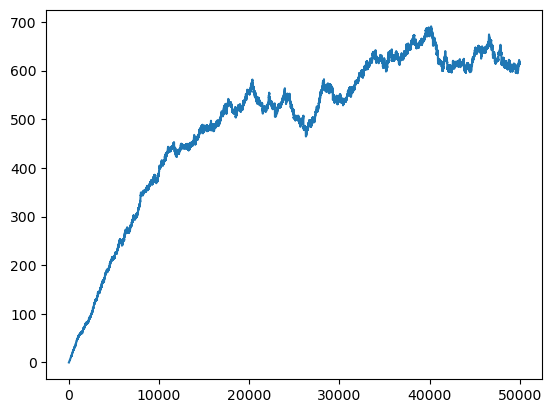

In [7]:
displacement = centroid[:,:,:] - centroid[:,0,:][:, np.newaxis, :]

msd = np.mean(np.sum( displacement**2, axis = 2), axis = 0)

D_msd = msd/(6*np.arange(1,displacement.shape[1]+1)*1e-3*10)

t = np.arange(displacement.shape[1])*1e-3*10

plt.plot(msd)

Text(0.5, 0, 'Time/ps')

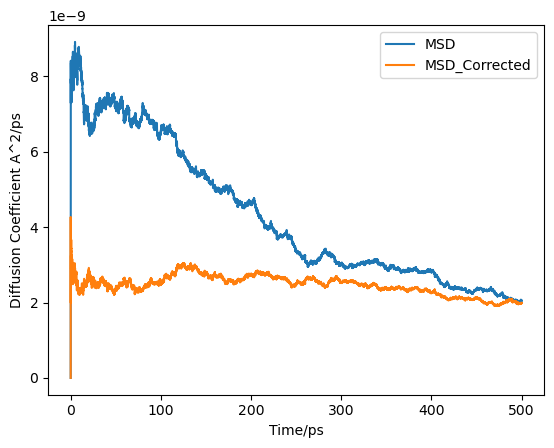

In [11]:
displacement_corrected = np.zeros(displacement.shape)

temp = displacement[:,0,:]

for i in range(1,displacement.shape[1]):    
    temp = ( (i - 1)*temp + displacement[:,i,:])/i
    displacement_corrected[:, i, :] = displacement[:, i, :] - 2*temp

msd_corrected = np.sum( displacement_corrected**2, axis = 2)

D_msd_corrected = np.mean(msd_corrected, axis = 0)/(6*np.arange(1,displacement.shape[1]+1)*1e-3*10)

plt.plot(t, D_msd*1e-8, label ='MSD')

plt.plot(t,D_msd_corrected*1e-8, label='MSD_Corrected')

plt.legend()

plt.ylabel('Diffusion Coefficient A^2/ps')
plt.xlabel('Time/ps')

In [9]:
displacement_tmean = np.mean(displacement, axis = 1)

temp0 = np.mean(np.sum( displacement[:,-1,:]**2, axis = 1), axis = 0)

temp1 = np.mean(np.sum(displacement[:, -1, :]*displacement_tmean, axis = 1), axis = 0)

temp2 = np.mean(np.sum(displacement_tmean*displacement_tmean, axis = 1), axis = 0)

D_corrected = (temp0 - 4*temp1 + 4*temp2)/(6*displacement.shape[1]*1e-3*10)

print(D_corrected, D_msd[-1], D_msd_corrected[-1])

0.19880927101116347 0.20561933550810918 0.1988164161699265


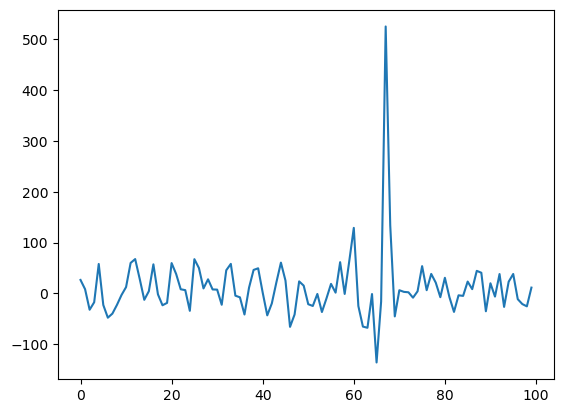

In [10]:
vel = vel_lst[:, :, 0, :]

vaf = np.mean( np.sum(vel[:, 67, :][:, np.newaxis,:]*vel, axis =2), axis = 0)

plt.plot(vaf[:100])